In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# Problem statement and context
**The objective of this analysis is to develop a predictive model to determine the likelihood of diabetes in women who are at leat 21 and are of Pima-Indian Heritage based on their health-related attributes.**

Diabetes is a prevalent health condition with serious implications for individuals and healthcare systems. Accurate prediction of diabetes can enable early intervention and targeted healthcare management. This analysis utilizes a dataset containing information about women's health attributes, including glucose levels, skin thickness, pregnancies, age, and BMI, to build a model that predicts the likelihood of diabetes. By developing an effective model, we aim to provide valuable insights for healthcare professionals and contribute to improved diabetes detection and management.

**The objectives I aim to achieve through this analysis are:**
* Perform EDA(exploratory data analysis) to gain insights into the dataset and understand the relationships, and characteristics of this feature
* Preprocess the data, including NaN values, scailing and potentially feature engineering.
* Build and compare different ML models which are suited for binary classification like Logistic Regression, Trees, Random Forests and XGBoost to predict the likelihood of diabetes
* Evaluate and interpret the performance of the models and select the most suitable model for predicting diabetes. In this notebook I will be using Cross-Validation to evaluate how accurate each model is on data it hasn't seen before.

# **Load the data in the df variable**

In [2]:
# Create a variable for the filepath
pima_filepath = '../input/pima-indians-diabetes-database/diabetes.csv'
df = pd.read_csv(pima_filepath)

# Now we perform EDA(exploratory data analysis) on the dataset.
Here we get a feel for the dataset. We can explore the distribution of each feature and it's relation to the target variable through the corr() method and through boxplots.

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No null values

# Visualization

0    500
1    268
Name: Outcome, dtype: int64


Text(0, 0.5, 'Count')

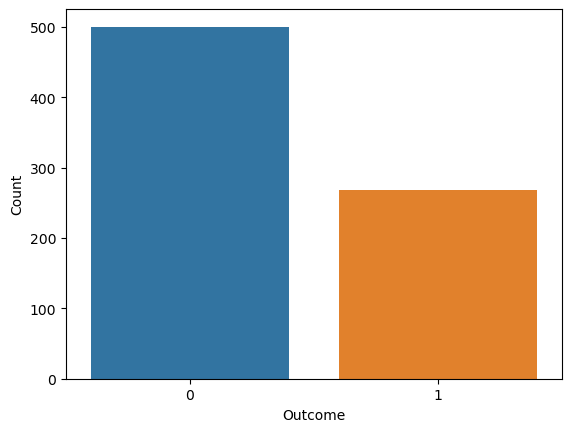

In [15]:
print(df['Outcome'].value_counts())
sns.countplot(x= df['Outcome'])
plt.xlabel('Outcome')
plt.ylabel('Count')


Here we can see that there is a class imbalance which could affect the model's performance. We'll have to adress this later.

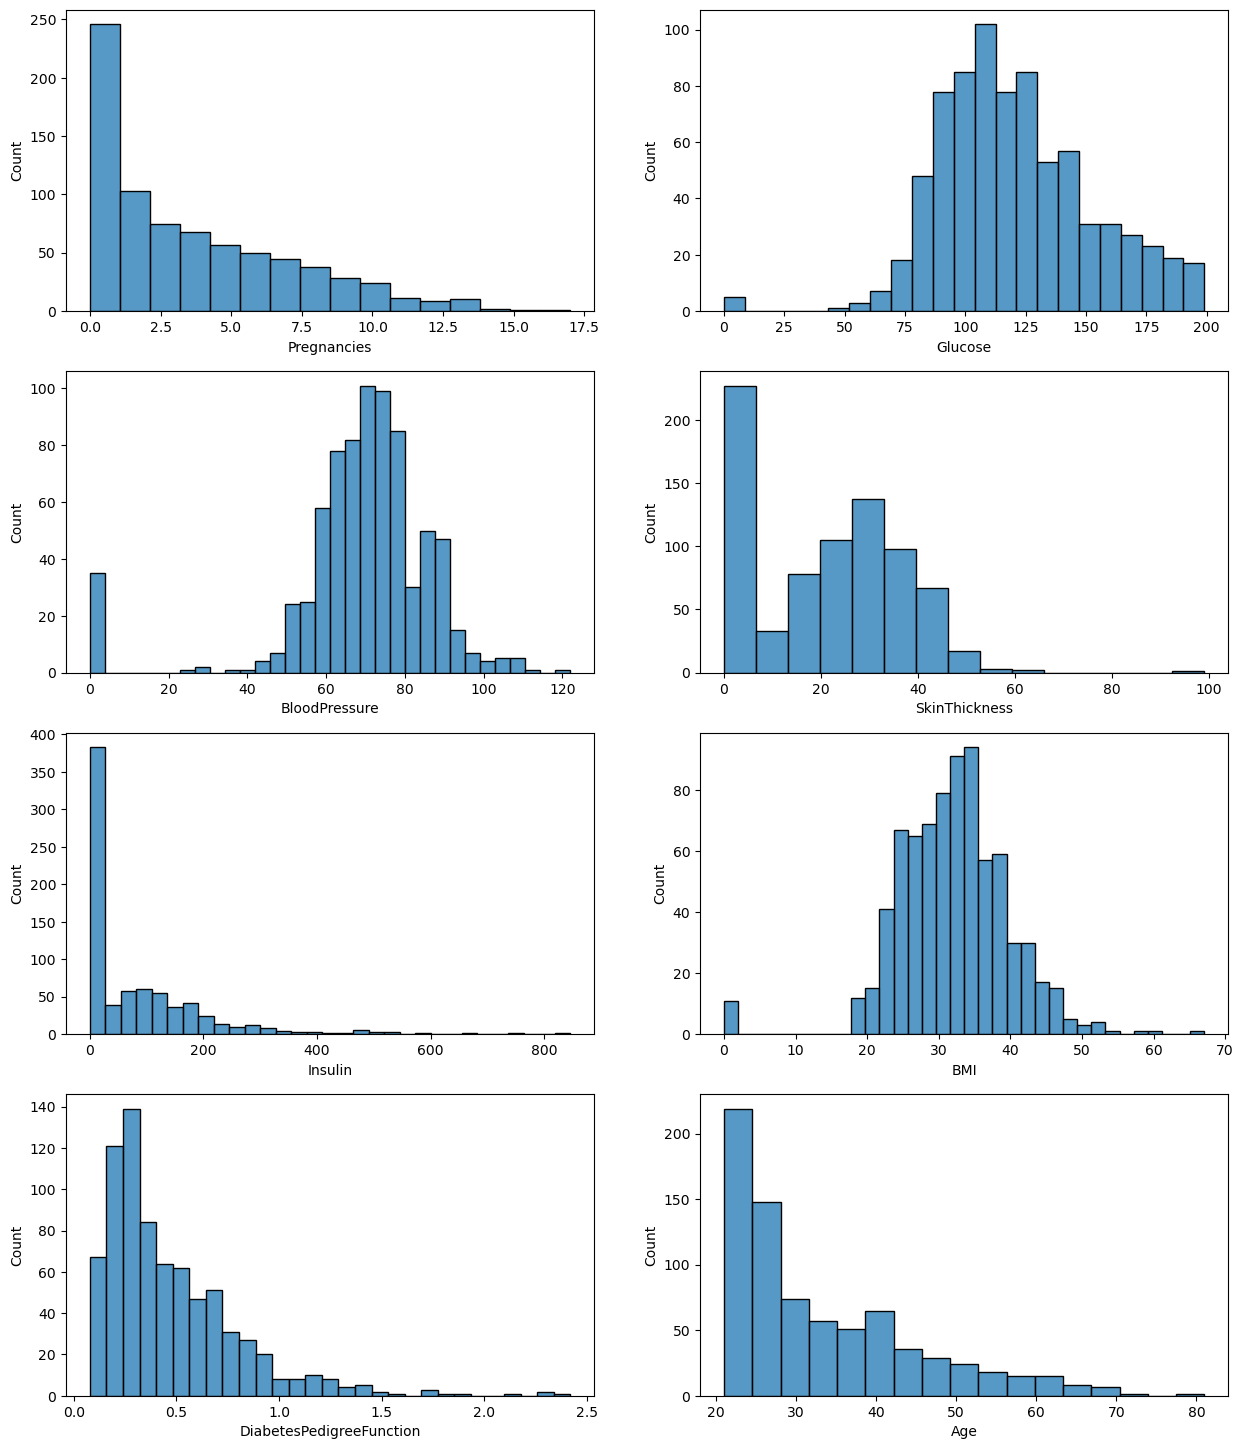

In [19]:
cols = df.columns
plt.figure(figsize=(15, 18))
for i in range(len(cols)-1):
    plt.subplot(4, 2, i+1)
    sns.histplot(df[cols[i]])
    plt.xlabel(cols[i])
    plt.ylabel('Count')

Here we can see the overall distribution of each feature. One thing that looks concerning is that values like the BMI, SkinThickness, BloodPressure(the insulin has many null values as well but that seems plausible because insulin might show 0 when it is under the detectable level) have null values which is impossible. We will have to adress this later through the use of an imputer.

<Axes: >

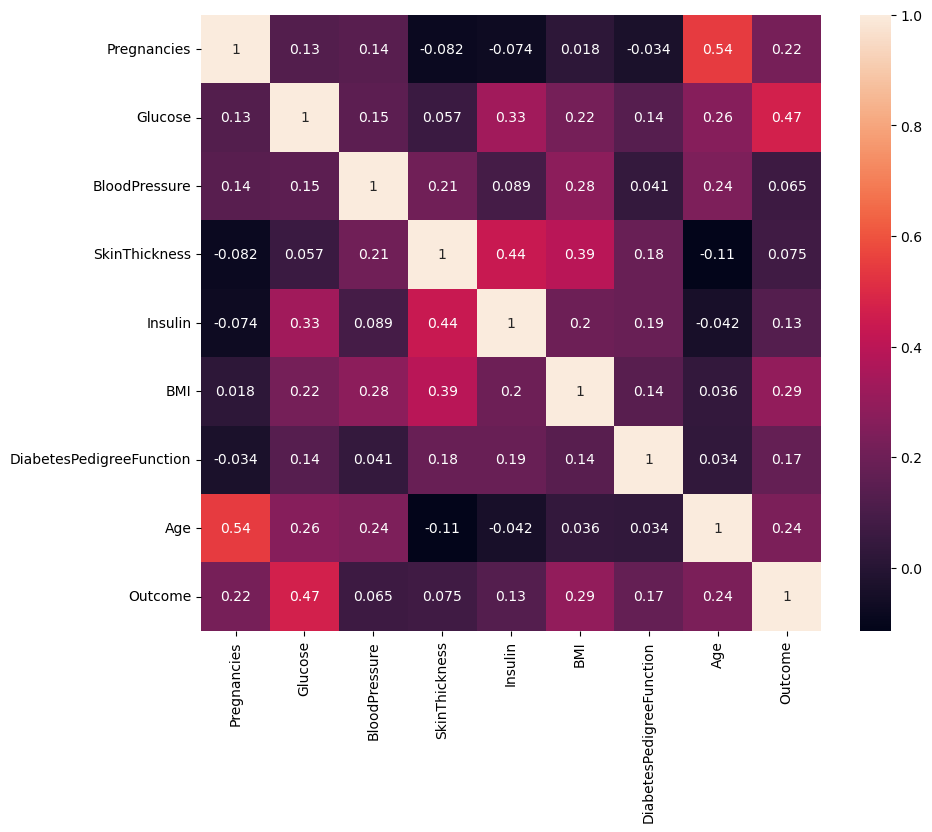

In [4]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)

In [25]:
corr['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

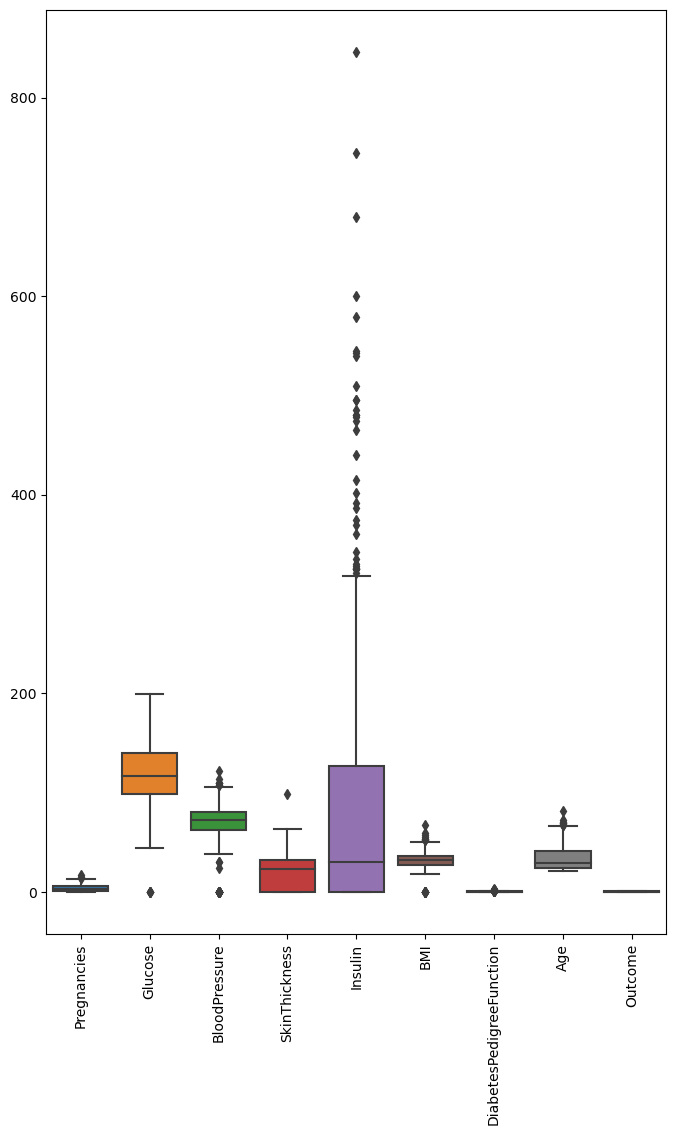

In [31]:
plt.figure(figsize=(8, 12))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
plt.show()

Here we can see that the Insulin feature has a considerable amount of outliers

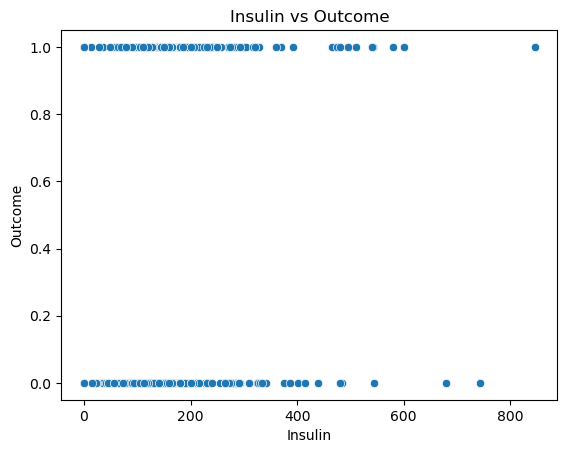

In [32]:
sns.scatterplot(x='Insulin', y='Outcome', data=df)
plt.xlabel('Insulin')
plt.ylabel('Outcome')
plt.title('Insulin vs Outcome')
plt.show()

I thought that because we have so many outliers we would find a limit. I thought that whenever somebody was over the limit they would have diabetes but after some deeper exploration I see that is not the case.

# **Data preprocessing**
# We split the datainto features and target variable

In [3]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [10]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# We do the class balancing using RandomOverSampler

In [4]:
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)

print(X.value_counts())
print(y.value_counts())

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age
0            121      66             30             165      34.3  0.203                     33     5
10           148      84             48             237      37.6  1.001                     51     5
5            124      74             0              0        34.0  0.220                     38     5
4            183      0              0              0        28.4  0.212                     36     4
             146      92             0              0        31.2  0.539                     61     4
                                                                                                   ..
2            94       76             18             66       31.6  0.649                     23     1
             95       54             14             88       26.1  0.748                     22     1
             96       68             13             49       21.1  0.647               

Now that the classes are equal the model's performance won't be affected by imbalancing.

# We split the data into training data and test data

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Now we can impute the null values which don't make sense
These are the BMI, SkinThickness, BloodPressure and Glucose. We exclude the Insulin because in some cases it might actually show 0 on tests.

In [6]:
from sklearn.impute import SimpleImputer

columns_to_impute = ['BMI', 'SkinThickness', 'BloodPressure', 'Glucose']

# We transform null values to NA so we can impute them
X_train[columns_to_impute] = X_train[columns_to_impute].mask(X_train[columns_to_impute] == 0, np.nan)

imputer = SimpleImputer(strategy='mean')
X_train[columns_to_impute] = imputer.fit_transform(X_train[columns_to_impute])
X_test[columns_to_impute] = imputer.transform(X_test[columns_to_impute])


# Now we can add a scale function which can scale our dataset for when we use a model thar requires scailing

In [7]:
def scale_data(X_train, X_test):
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    new_X_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
    new_X_test = pd.DataFrame(scaled_X_test, columns=X_test.columns)
    return new_X_train, new_X_test

# **Model training**
In this step we'll try multiple models to see how they perform, some models like LogisticRegression may require scailing so that's why we created the scale function

# Score Function
To make checking the score easier I created a function which takes in the model, training and test data and gives us it's accuracy score.

In [8]:
def check_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return score, y_pred

# Logistic Regression

In [9]:
new_X_train, new_X_test = scale_data(X_train, X_test)
model = LogisticRegression()

score, prediction = check_score(model, new_X_train, new_X_test, y_train, y_test)
print(score)

0.724


# Random Forest

In [28]:
scores = []
best_score = 0
best_estimator = 0
best_pred = []

for i in range(10, 110):
    model = RandomForestClassifier(n_estimators=i)
    score, prediction = check_score(model, X_train, X_test, y_train, y_test)
    scores.append(score)
    if score > best_score:
        best_estimator = i
        best_score = score
        best_pred = prediction


print(best_score)
print(best_estimator)

0.82
78


0.82


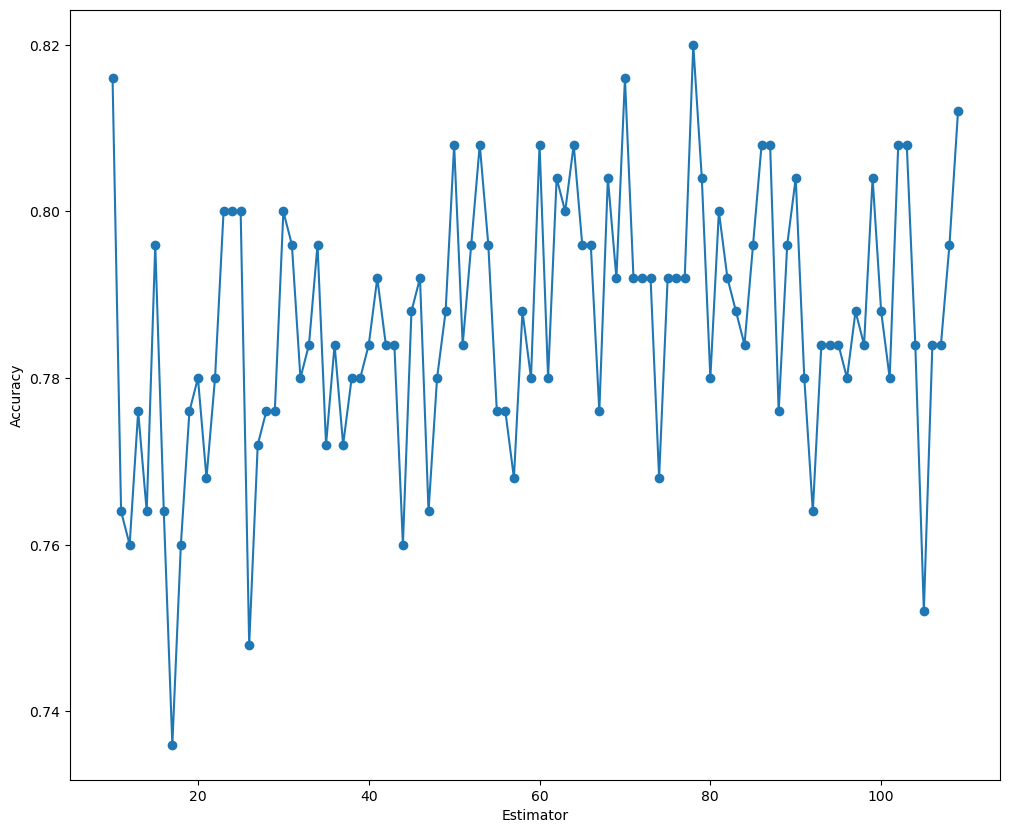

In [30]:
plt.figure(figsize=(12, 10))
plt.plot(range(10, 110), scores, marker='o')
plt.ylabel('Accuracy')
plt.xlabel('Estimator')
print(max(scores))

Here we can visualize how the accuracy is affected by n_estimators

# Decision Tree

In [29]:
model = DecisionTreeClassifier()
score, prediction = check_score(model, X_train, X_test, y_train, y_test)
print(score)

0.736


# XGBoost

In [31]:
from xgboost import XGBClassifier
scores = []
best_score = 0
best_estimator = 0
best_pred = []

for i in range(10, 110):
    model = XGBClassifier(n_estimators=i)
    score, prediction = check_score(model, X_train, X_test, y_train, y_test)
    scores.append(score)
    if score > best_score:
        best_estimator = i
        best_score = score
        best_pred = prediction


print(best_score)
print(best_estimator)

0.812
33


0.812


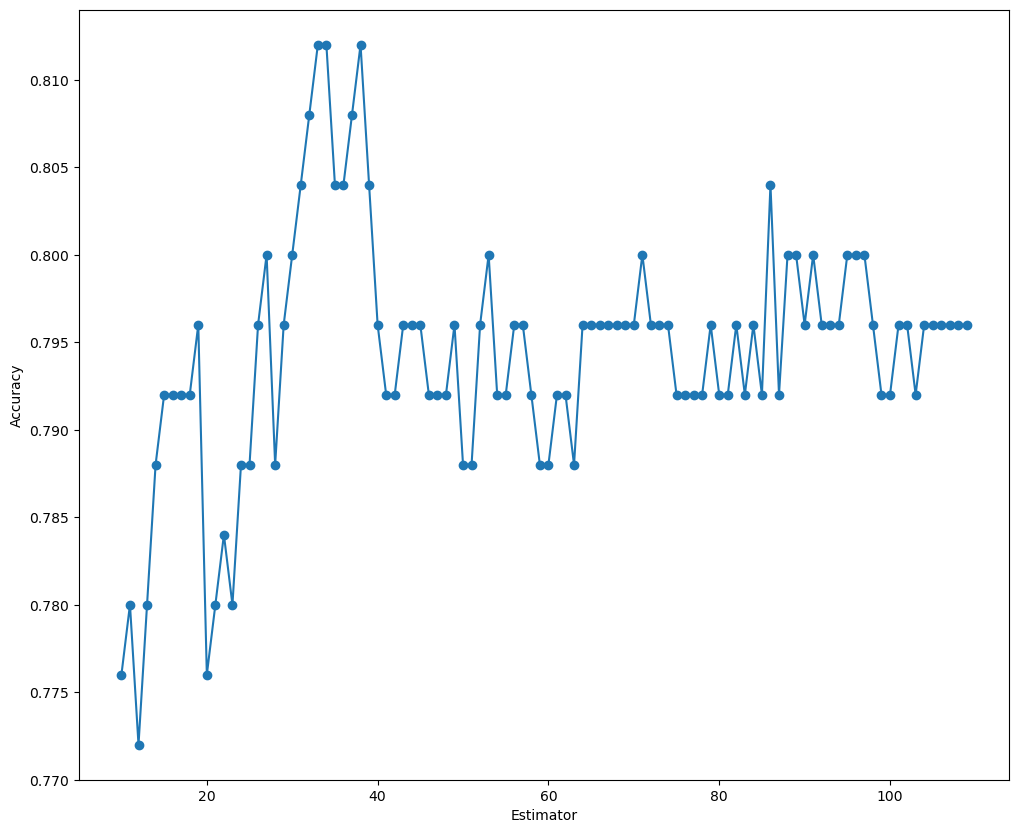

In [32]:
plt.figure(figsize=(12, 10))
plt.plot(range(10, 110), scores, marker='o')
plt.ylabel('Accuracy')
plt.xlabel('Estimator')
print(max(scores))

Here we can visualize how the n-estimators argument affects the model's performance

# Support Vector Machine

In [10]:
model = svm.SVC(kernel='linear')

score, prediction = check_score(model, X_train, X_test, y_train, y_test)
print(score)

0.756


# K-Nearest Neighbours

In [12]:
model = KNeighborsClassifier(n_neighbors=3)
score, predictions = check_score(model, X_train, X_test, y_train, y_test)
print(score)

0.716
